In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA #主成分分析器
from astropy.io import fits
from scipy import signal
from sklearn import preprocessing
from scipy.stats import gaussian_kde
import umap.umap_ as umap
import glob
import os

In [24]:
columns_to_keep = ['反射率_v']
target_dir = "20051019"
csv_dir = f"../output_preprocess/{target_dir}/reflectance/"
csv_file = sorted(glob.glob(os.path.join(csv_dir, "*area*.csv")))
target_csv = csv_file[0]
name = target_csv.split("_area")
name[0]
nam = name[0].split("reflectance")
img = plt.imread(f"{nam[0]}registration{nam[1]}.jpg")
df = pd.read_csv(target_csv).drop(columns = columns_to_keep)
# df = pd.read_csv("../output_preprocess/20051119/reflectance/0_area17.csv").drop(columns = columns_to_keep)
# dfs = df.iloc[:, 1:].drop(columns=columns_to_keep)
df = df[~((df == 0) | (df == np.inf)).any(axis=1)]
df_ave = pd.DataFrame(columns=['反射率_b', '反射率_w', '反射率_p'])

for i in range(df["エリア"].astype('int').max()):
    df_area = df[df["エリア"]==i+1]
    # dfs = df_area.iloc[:, 2:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
    df_ave.loc[len(df_ave)+1] = [df_area["反射率_b"].mean(), df_area["反射率_w"].mean(), df_area["反射率_p"].mean()]

df_aves = df.iloc[:, 3:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
df_area_aves = df_ave.apply(lambda x: x/x.std(), axis=0)


df_aves = df_aves.dropna()
df_area_aves = df_area_aves.dropna()

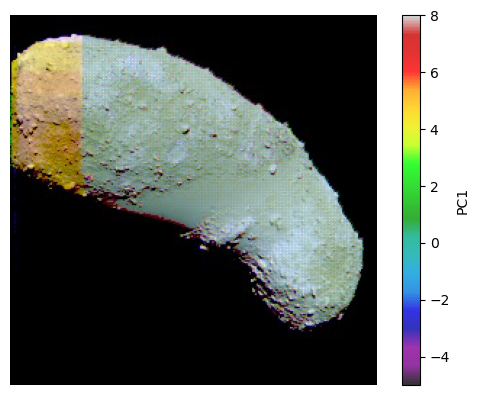

In [19]:
#all coordinate ignore thresh
all_csv = f"{name[0]}_allcoord_.csv"
df_all = pd.read_csv(all_csv).drop(columns = columns_to_keep)
df_all = df_all[~((df_all == 0) | (df_all == np.inf)).any(axis=1)]
df_alls = df_all.iloc[:, 2:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
df_alls = df_alls.dropna()

pca = PCA()
pca.fit(df_alls)
# データを主成分空間に写像
feature = pca.transform(df_alls)

plot_pca = pd.concat([df_all.iloc[:, 0:2].reset_index(drop=True), pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(df_alls.columns))])], axis = 1)
plt.imshow(img)
cb_min, cb_max = -5, 8
cb_div = 16
# カラーバーを表示
plt.scatter(plot_pca['座標_x'], plot_pca['座標_y'], c=plot_pca['PC1'], cmap='nipy_spectral', s=0.01, vmin = cb_min, vmax = cb_max, alpha = 0.8)
#plt.scatter(plot_pca['座標_x'], plot_pca['座標_y'], c=plot_pca['PC1'], cmap='nipy_spectral', s=0.01, alpha = 0.8)
plt.colorbar(label='PC1')

# ラベルやタイトルの設定
# plt.xlabel('X')
# plt.ylabel('Y')
plt.gca().invert_yaxis()
plt.axis("off")
plt.savefig(f"{name[0]}_ignorethresh_pca_on.pdf")
plt.show()

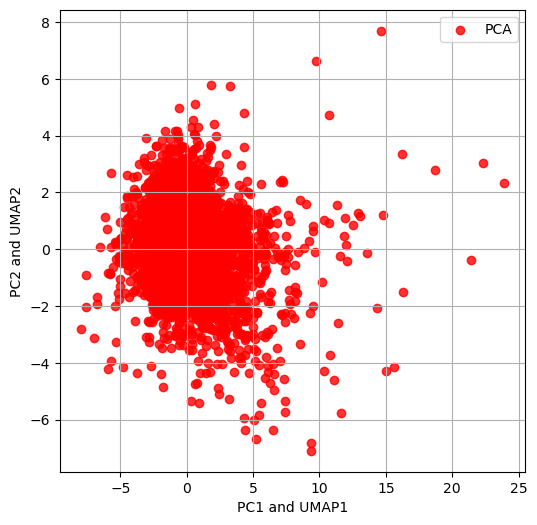

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha = 0.8, c = "red", label = "PCA")
plt.grid()
plt.legend()
plt.xlabel("PC1 and UMAP1")
plt.ylabel("PC2 and UMAP2")
# plt.savefig(f"{name[0]}_abovethresh_comp_PCAandUMAP.pdf")
plt.show()

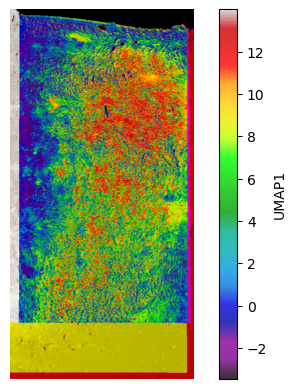

In [5]:
reducer = umap.UMAP(n_components=3)
u_feature = reducer.fit_transform(df_alls)

plot_umap = pd.concat([df_all.iloc[:, 0:2].reset_index(drop=True), pd.DataFrame(u_feature, columns=["umap{}".format(x + 1) for x in range(len(df_alls.columns))])], axis = 1)
plt.imshow(img)
cb_min, cb_max = -4, 4
cb_div = 16
# カラーバーを表示
# plt.scatter(plot_umap['座標_x'], plot_umap['座標_y'], c=plot_umap['umap1'], cmap='nipy_spectral', s=0.01, vmin = cb_min, vmax = cb_max, alpha = 0.8)
plt.scatter(plot_umap['座標_x'], plot_umap['座標_y'], c=plot_umap['umap1'], cmap='nipy_spectral', s=0.01, alpha = 0.8)
plt.colorbar(label='UMAP1')
# ラベルやタイトルの設定
# plt.xlabel('X')
# plt.ylabel('Y')
plt.gca().invert_yaxis()
plt.axis("off")
# plt.savefig(f"{name[0]}_pca_on.pdf")
plt.savefig(f"{name[0]}_ignorethresh_umap.pdf")
plt.show()

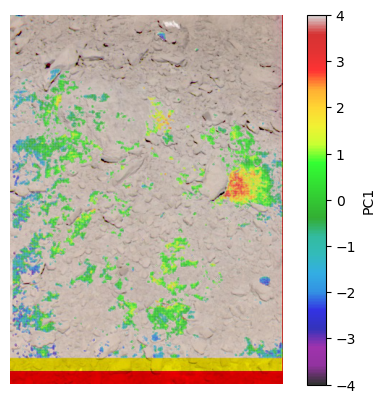

In [3]:
#thresh ignore area
all_csv = f"{name[0]}_.csv"
df_all = pd.read_csv(all_csv).drop(columns = columns_to_keep)
df_all = df_all[~((df_all == 0) | (df_all == np.inf)).any(axis=1)]
df_alls = df_all.iloc[:, 2:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
df_alls = df_alls.dropna()

pca = PCA()
pca.fit(df_alls)
# データを主成分空間に写像
feature = pca.transform(df_alls)

plot_pca = pd.concat([df_all.iloc[:, 0:2].reset_index(drop=True), pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(df_alls.columns))])], axis = 1)
plt.imshow(img)
cb_min, cb_max = -4, 4
cb_div = 16
# カラーバーを表示
plt.scatter(plot_pca['座標_x'], plot_pca['座標_y'], c=plot_pca['PC1'], cmap='nipy_spectral', s=0.01, vmin = cb_min, vmax = cb_max, alpha = 0.8)
#plt.scatter(plot_pca['座標_x'], plot_pca['座標_y'], c=plot_pca['PC1'], cmap='nipy_spectral', s=0.01, alpha = 0.8)
plt.colorbar(label='PC1')

# ラベルやタイトルの設定
# plt.xlabel('X')
# plt.ylabel('Y')
plt.gca().invert_yaxis()
plt.axis("off")
plt.savefig(f"{name[0]}_abovethresh_pca_on.pdf")
plt.show()

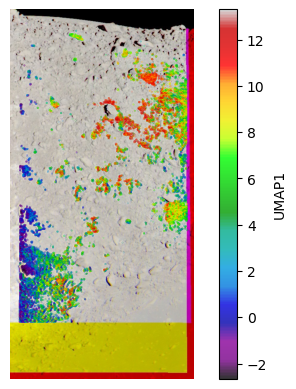

In [7]:
reducer = umap.UMAP(n_components=3)
u_feature = reducer.fit_transform(df_alls)

plot_umap = pd.concat([df_all.iloc[:, 0:2].reset_index(drop=True), pd.DataFrame(u_feature, columns=["umap{}".format(x + 1) for x in range(len(df_alls.columns))])], axis = 1)
plt.imshow(img)
cb_min, cb_max = -4, 4
cb_div = 16
# カラーバーを表示
# plt.scatter(plot_umap['座標_x'], plot_umap['座標_y'], c=plot_umap['umap1'], cmap='nipy_spectral', s=0.01, vmin = cb_min, vmax = cb_max, alpha = 0.8)
plt.scatter(plot_umap['座標_x'], plot_umap['座標_y'], c=plot_umap['umap1'], cmap='nipy_spectral', s=0.01, alpha = 0.8)
plt.colorbar(label='UMAP1')
# ラベルやタイトルの設定
# plt.xlabel('X')
# plt.ylabel('Y')
plt.gca().invert_yaxis()
plt.axis("off")
# plt.savefig(f"{name[0]}_pca_on.pdf")
plt.savefig(f"{name[0]}_abovethresh_umap_3.pdf")
plt.show()

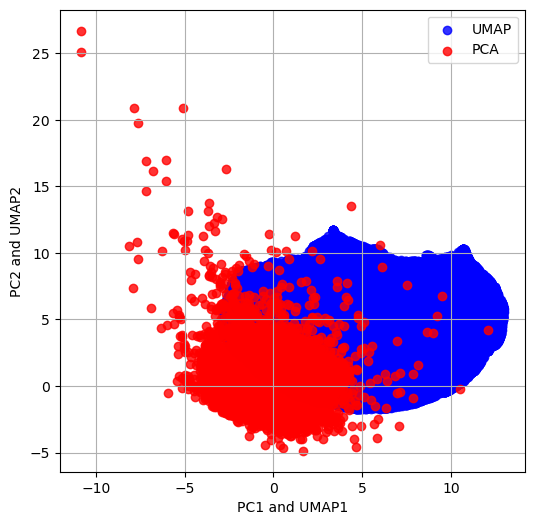

In [32]:
plt.figure(figsize=(6, 6))
plt.scatter(u_feature[:, 0], u_feature[:, 1], alpha = 0.8, c = "blue", label = "UMAP")
plt.scatter(feature[:, 0], feature[:, 1], alpha = 0.8, c = "red", label = "PCA")
plt.grid()
plt.legend()
plt.xlabel("PC1 and UMAP1")
plt.ylabel("PC2 and UMAP2")
plt.savefig(f"{name[0]}_abovethresh_comp_PCAandUMAP.pdf")
plt.show()

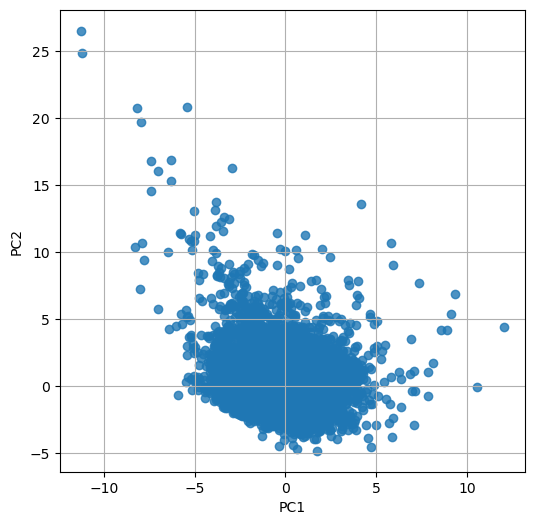

In [21]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha = 0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [3]:
#umap
reducer = umap.UMAP(n_components=3)
u_feature = reducer.fit_transform(df_aves)
pd.DataFrame(u_feature, columns=["umap{}".format(x + 1) for x in range(len(df_aves.columns))])

,umap1,umap2,umap3
0,-2.290105,3.628578,3.448114
1,-2.288512,4.744720,2.397165
2,-1.170711,2.816032,4.672587
3,1.134424,4.589246,1.977555
4,6.349316,6.359725,2.658923
...,...,...,...
24253,1.983832,7.798465,7.087817
24254,1.545256,6.134675,7.600805
24255,4.428814,5.328170,6.405991
24256,4.274338,6.982970,7.589242


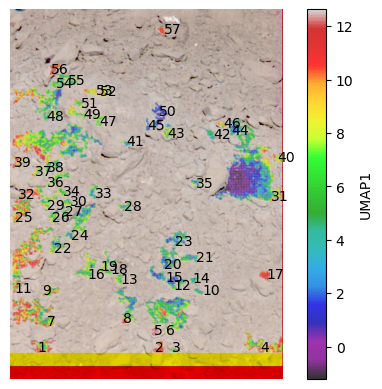

In [5]:
#umap
reducer = umap.UMAP(n_components=3)
u_feature = reducer.fit_transform(df_aves)
plot_umap = pd.concat([df.iloc[:, 1:3].reset_index(drop=True), pd.DataFrame(u_feature, columns=["umap{}".format(x + 1) for x in range(len(df_aves.columns))])], axis = 1)
plt.imshow(img)
cb_min, cb_max = -4, 4
cb_div = 16
# カラーバーを表示
# plt.scatter(plot_umap['座標_x'], plot_umap['座標_y'], c=plot_umap['umap1'], cmap='nipy_spectral', s=0.01, vmin = cb_min, vmax = cb_max, alpha = 0.8)
plt.scatter(plot_umap['座標_x'], plot_umap['座標_y'], c=plot_umap['umap1'], cmap='nipy_spectral', s=0.01, alpha = 0.8)
plt.colorbar(label='UMAP1')

for i in range(df["エリア"].astype('int').max()):
    df_area = df[df["エリア"]==i+1]
    plt.text(df_area.iloc[1]["座標_x"], df_area.iloc[1]["座標_y"], f"{i+1}")
# ラベルやタイトルの設定
# plt.xlabel('X')
# plt.ylabel('Y')
plt.gca().invert_yaxis()
plt.axis("off")
# plt.savefig(f"{name[0]}_pca_on.pdf")
plt.savefig(f"{name[0]}_umap_on.pdf")
plt.show()

In [6]:
#主成分分析の実行
pca = PCA()
pca.fit(df_aves)
# データを主成分空間に写像
feature = pca.transform(df_aves)

In [11]:
#主成分分析の実行
pca = PCA()
pca.fit(df_area_aves)
# データを主成分空間に写像
features = pca.transform(df_area_aves)
# pd.DataFrame(features, columns=["PC{}".format(x + 1) for x in range(len(df_area_aves.columns))])

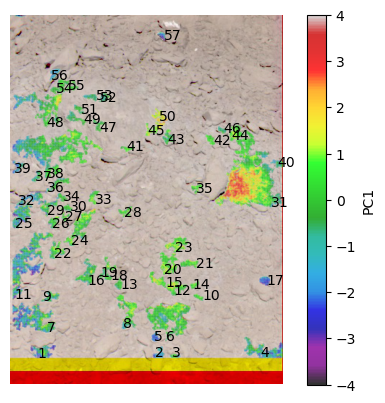

In [7]:
plot_pca = pd.concat([df.iloc[:, 1:3].reset_index(drop=True), pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(df_aves.columns))])], axis = 1)
plt.imshow(img)
cb_min, cb_max = -4, 4
cb_div = 16
# カラーバーを表示
plt.scatter(plot_pca['座標_x'], plot_pca['座標_y'], c=plot_pca['PC1'], cmap='nipy_spectral', s=0.01, vmin = cb_min, vmax = cb_max, alpha = 0.8)
#plt.scatter(plot_pca['座標_x'], plot_pca['座標_y'], c=plot_pca['PC1'], cmap='nipy_spectral', s=0.01, alpha = 0.8)
plt.colorbar(label='PC1')

for i in range(df["エリア"].astype('int').max()):
    df_area = df[df["エリア"]==i+1]
    plt.text(df_area.iloc[1]["座標_x"], df_area.iloc[1]["座標_y"], f"{i+1}")
# ラベルやタイトルの設定
# plt.xlabel('X')
# plt.ylabel('Y')
plt.gca().invert_yaxis()
plt.axis("off")
plt.savefig(f"{name[0]}_pca_on.pdf")
plt.show()

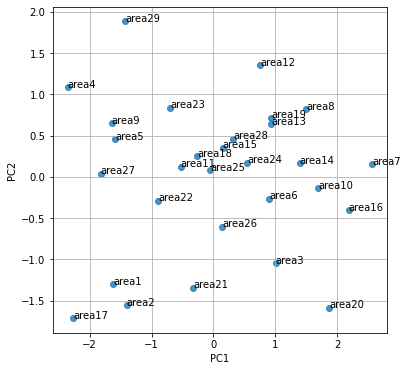

In [100]:
# 第一主成分と第二主成分でプロットする
colors = plt.cm.tab20.colors[:len(df_area_aves)]
labels = ['No.'+str(num) for num in range(1,len(df_aves)+1)]
plt.figure(figsize=(6, 6))
plt.scatter(features[:, 0], features[:, 1], alpha = 0.8)
for i in range(len(df_area_aves)):
    plt.text(features[i, 0], features[i, 1], f"area{i+1}")
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig(f"{name[0]}_ave_pc1_2.pdf")
plt.show()


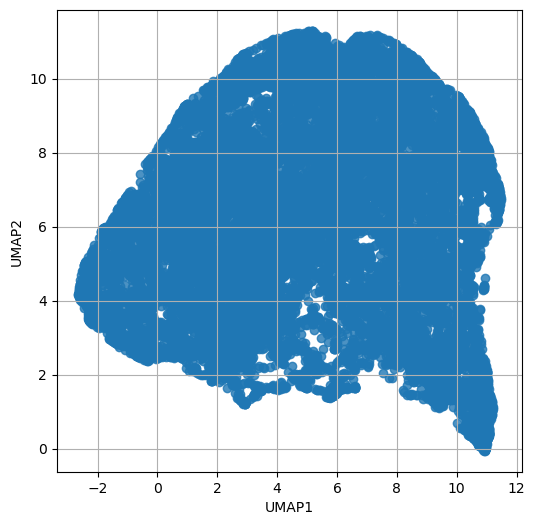

In [7]:
plt.figure(figsize=(6, 6))
plt.scatter(u_feature[:, 0], u_feature[:, 1], alpha = 0.8)
plt.grid()
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.savefig(f"{name[0]}_UMAP.pdf")
plt.show()

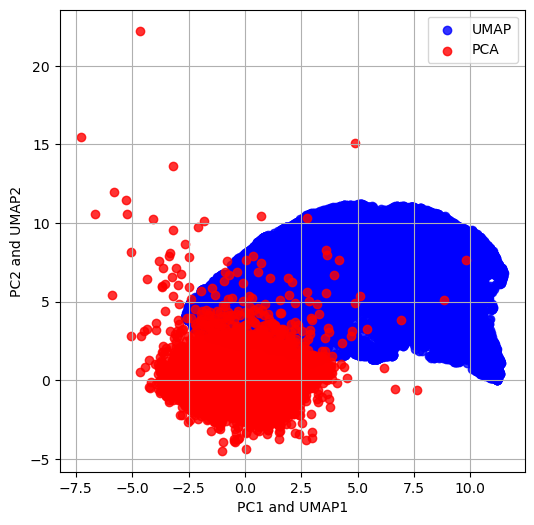

In [43]:
colors = plt.cm.tab20.colors[:len(df_aves)]
labels = ['No.'+str(num) for num in range(1,len(df_aves)+1)]
plt.figure(figsize=(6, 6))
plt.scatter(u_feature[:, 0], u_feature[:, 1], alpha = 0.8, c = "blue", label = "UMAP")
plt.scatter(feature[:, 0], feature[:, 1], alpha = 0.8, c = "red", label = "PCA")
plt.grid()
plt.legend()
plt.xlabel("PC1 and UMAP1")
plt.ylabel("PC2 and UMAP2")
plt.savefig(f"{name[0]}_comp_PCAandUMAP.pdf")
plt.show()

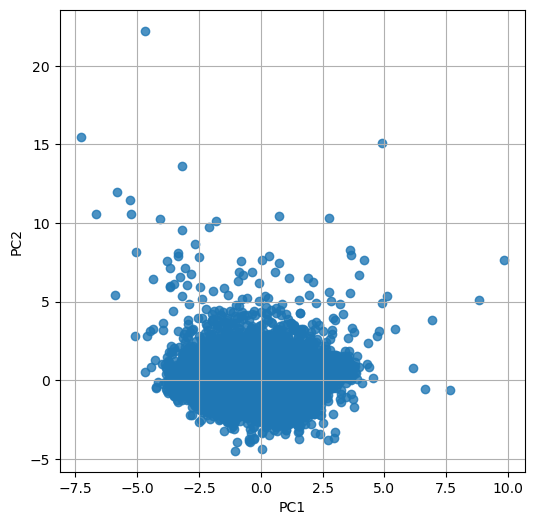

In [39]:
# 第一主成分と第二主成分でプロットする
colors = plt.cm.tab20.colors[:len(df_aves)]
labels = ['No.'+str(num) for num in range(1,len(df_aves)+1)]
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha = 0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig(f"{name[0]}_pc1_2.pdf")
plt.show()

In [26]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(df_aves.columns))])

,0
PC1,0.514868
PC2,0.385975
PC3,0.099157
